### **Financial Data**

In [1]:
import pandas as pd
import numpy as np
from pylab import plt
plt.style.use('ggplot')
# put all plots in the notebook itself
%matplotlib inline

## Retrieving Stock Price Data

We retrieve **end-of-day (get_data_yahoo) price data** for certain instruments. # Use optional

In [2]:
#%run getData.ipynb

### Import Dataset

In [3]:
data = pd.read_csv('./dataset/data.csv',
                   index_col=0, parse_dates=True)

We retrieve **end-of-day (EOD) price data** for certain instruments (data source: Thomson Reuters Eikon API).

In [4]:
#data = pd.read_csv('http://hilpisch.com/tr_eikon_eod_data.csv',
#                   index_col=0, parse_dates=True)

In [5]:
type(data) # the object is of **type** `DataFrame`.

pandas.core.frame.DataFrame

In [6]:
data.info() # meta information

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3204 entries, 2010-01-04 to 2022-09-23
Columns: 439 entries, MMM to ZION
dtypes: float64(439)
memory usage: 10.8 MB


## Working with the Data

In [7]:
data.tail() # final five rows

,MMM,AOS,ABT,ABMD,ACN,ATVI,ADM,ADBE,ADP,AAP,...,WHR,WMB,WTW,GWW,WYNN,XEL,YUM,ZBRA,ZBH,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2022-09-19,116.639999,52.590000,104.089996,257.869995,274.980011,75.940002,87.330002,296.059998,235.720001,168.179993,...,147.259995,32.060001,208.759995,535.099976,65.889999,74.529999,116.160004,291.209991,113.400002,58.380001
2022-09-20,116.519997,51.220001,102.309998,258.989990,270.239990,75.040001,86.750000,291.059998,233.539993,165.869995,...,142.889999,31.830000,208.350006,531.000000,67.800003,73.480003,115.250000,285.649994,111.769997,57.700001
2022-09-21,114.809998,51.060001,100.650002,252.809998,265.420013,75.320000,86.000000,286.299988,230.419998,165.500000,...,142.500000,31.469999,205.020004,516.750000,63.990002,72.500000,112.570000,285.079987,110.199997,57.099998
2022-09-22,114.139999,50.520000,101.070000,247.259995,262.320007,77.029999,86.070000,287.059998,230.470001,164.110001,...,140.169998,31.160000,203.399994,504.239990,60.189999,72.449997,110.790001,272.940002,108.010002,55.750000
2022-09-23,112.989998,49.830002,100.680000,245.529999,259.980011,74.949997,81.650002,284.559998,230.279999,160.500000,...,140.789993,29.150000,200.339996,494.850006,59.650002,71.559998,110.650002,268.040009,106.209999,54.520000


You can easily **select single or multiple columns** of a `DataFrame` object.

In [8]:
data['MMM'].head() # first five rows of single column

Date
2010-01-04    58.128872
2010-01-05    57.764786
2010-01-06    58.583992
2010-01-07    58.626011
2010-01-08    59.039120
Name: MMM, dtype: float64

In [9]:
data[['AOS', 'ABT']].tail() # last five rows of 2 columns

,AOS,ABT
Date,,
2022-09-19,52.590000,104.089996
2022-09-20,51.220001,102.309998
2022-09-21,51.060001,100.650002
2022-09-22,50.520000,101.070000
2022-09-23,49.830002,100.680000


Similarly, you can select **single or multiple rows**.

In [10]:
data.loc['2010-01-04'] # single row via index value

MMM     58.128872
AOS      6.179977
ABT     19.613131
ABMD     8.740000
ACN     33.117538
          ...    
XEL     13.597205
YUM     19.706152
ZBRA    28.670000
ZBH     53.314457
ZION    11.218827
Name: 2010-01-04 00:00:00, Length: 439, dtype: float64

In [11]:
data.iloc[:2] # two rows via index numbers

,MMM,AOS,ABT,ABMD,ACN,ATVI,ADM,ADBE,ADP,AAP,...,WHR,WMB,WTW,GWW,WYNN,XEL,YUM,ZBRA,ZBH,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,58.128872,6.179977,19.613131,8.74,33.117538,10.018279,22.611660,37.090000,27.624422,37.555935,...,58.489887,9.215943,54.241116,77.202614,41.963726,13.597205,19.706152,28.670000,53.314457,11.218827
2010-01-05,57.764786,6.101012,19.454662,8.53,33.322208,10.036011,22.733807,37.700001,27.476080,37.332722,...,58.368587,9.331087,54.119553,77.234360,44.515923,13.435948,19.638758,28.620001,55.002193,11.614383


## Data Visualization

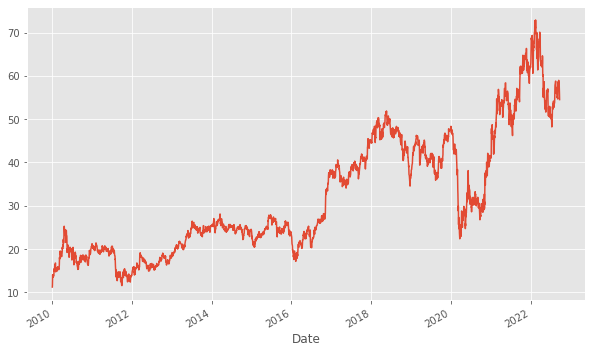

In [12]:
data['ZION'].plot(figsize=(10, 6)); # here is also a powerful **method for plotting**.

Let us calculate the ZION stock price **log returns**.

In [13]:
rets= np.log(data['ZION'] /data['ZION'].shift(1))

The log returns can then be visualized via a **histogram**.

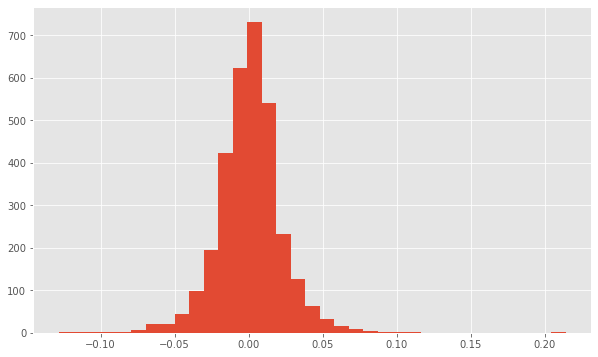

In [14]:
rets.hist(figsize=(10,6), bins=35);

## Calculating a Moving Average

pandas provides, among others, convenience functions for the calculation of **moving averages**.

In [15]:
# fully vectorized calculation of 50 days simple moving average/trend
data['SMA50'] = data['ZION'].rolling(50).mean()
data.dropna(inplace=True) 

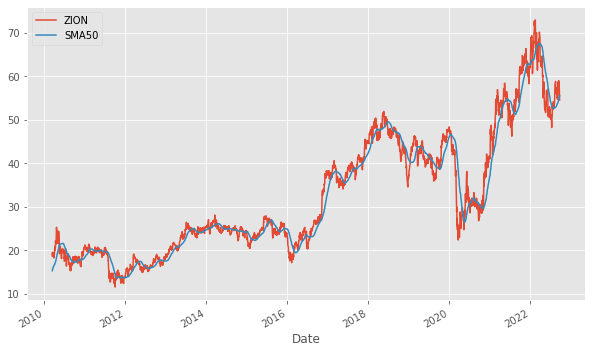

In [16]:
data[['ZION','SMA50']].plot(figsize=(10,6));

In [17]:
# fully vectorized calculation of 9 days standard deviation/trend
data['STD'] = data['ZION'].rolling(window=9).std()

In [18]:
# fully vectorized calculation of 21 days max value/trend
data['MAX'] = data['ZION'].rolling(21).max()
data.dropna(inplace=True)

In [19]:
data[['ZION','STD','MAX']]

,ZION,STD,MAX
Date,,,
2010-04-14,22.197496,1.026537,22.197496
2010-04-15,22.012234,0.901637,22.197496
2010-04-16,21.498564,0.824324,22.197496
2010-04-19,21.414358,0.819599,22.197496
2010-04-20,23.090111,0.975081,23.090111
...,...,...,...
2022-09-19,58.380001,0.812820,58.970001
2022-09-20,57.700001,0.546283,58.970001
2022-09-21,57.099998,0.650233,58.970001


# End!